# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [3]:
# Import essential libraries for data manipulation and analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [4]:
# Importing the file porter_data_1.csv

porter = pd.read_csv(r"C:\Users\USER\OneDrive\Desktop\AI_course\Delivery_Starter\porter_data_1.csv")
porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [5]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
porter['created_at'] = pd.to_datetime(porter['created_at'])
porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])
print(porter['created_at'].dtypes)

datetime64[ns]


##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [6]:
# Convert categorical features to category type

categorical_cols = ['market_id', 'store_primary_category', 'order_protocol']
for col in categorical_cols:
    porter[col] = porter[col].astype('category')
print(porter.dtypes)


market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object


#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

In [7]:



porter['created_at'] = pd.to_datetime(porter['created_at'])

porter['actual_delivery_time'] = pd.to_datetime(porter['actual_delivery_time'])

porter['delivery_time'] = porter['actual_delivery_time'] - porter['created_at']


porter['delivery_time_mins'] = porter['delivery_time'].dt.total_seconds() / 60
porter['delivery_time_hours'] = porter['delivery_time'].dt.total_seconds() / 3600


porter['order_hour'] = porter['created_at'].dt.hour


porter['order_day'] = porter['created_at'].dt.day_name()


##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [8]:
# Calculate time taken in minutes
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance   delivery_time  delivery_time_mins  \
0                      21.0     34.44 0 days 00:47:00                47.0   
1                       2.0     27.60 0 days 00:44:00                44.0   
2                      18.0     11.56 0 days 00:55:00                55.0   
3                       8.0     31.80 0 days 00:59:00                59.0   
4                       7.0      8.20 0 days 00:46:00                46.0   

   delivery_time_hours  order_hour order_day  
0             0.783333          22    Friday  
1             0.733333          21   Tuesday  
2             0.916667           0    Monday  
3             0.983333           3  Thursday  
4             0.766667           2   Tuesday

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [9]:
# Extract the hour and day of week from the 'created_at' timestamp

# Create a categorical feature 'isWeekend'

porter['created_at'] = pd.to_datetime(porter['created_at'])

# Extract day of the week and create 'isWeekend' column
porter['isWeekend'] = (porter['created_at'].dt.dayofweek >= 5).astype(int)
porter.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance   delivery_time  delivery_time_mins  \
0                      21.0     34.44 0 days 00:47:00                47.0   
1                       2.0     27.60 0 days 00:44:00                44.0   
2                      18.0     11.56 0 days 00:55:00                55.0   
3                       8.0     31.80 0 days 00:59:00                59.0   
4                       7.0      8.20 0 days 00:46:00                46.0   

   delivery_time_hours  order_hour order_day  isWeekend  
0             0.783333          22    Friday          0  
1             0.733333          21   Tuesday          0  
2             0.916667           0    Monday          0  
3             0.983333           3  Thursday          0  
4             0.766667           2   Tuesday          0

In [10]:
# Drop unnecessary columns
porter.drop(columns=[
    'created_at',
    'actual_delivery_time',
    'store_primary_category'
], inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [11]:
# Define target variable (y) and features (X)
y = porter['delivery_time_mins']
X = porter.drop(columns=['delivery_time_mins'])


##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [12]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [13]:
# Define numerical and categorical columns for easy EDA and data manipulation


numerical_cols = porter.select_dtypes(include=['int64', 'float64']).columns.tolist()


categorical_cols = porter.select_dtypes(include=['category', 'object']).columns.tolist()
print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'delivery_time_mins', 'delivery_time_hours']
Categorical columns: ['market_id', 'order_protocol', 'order_day']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

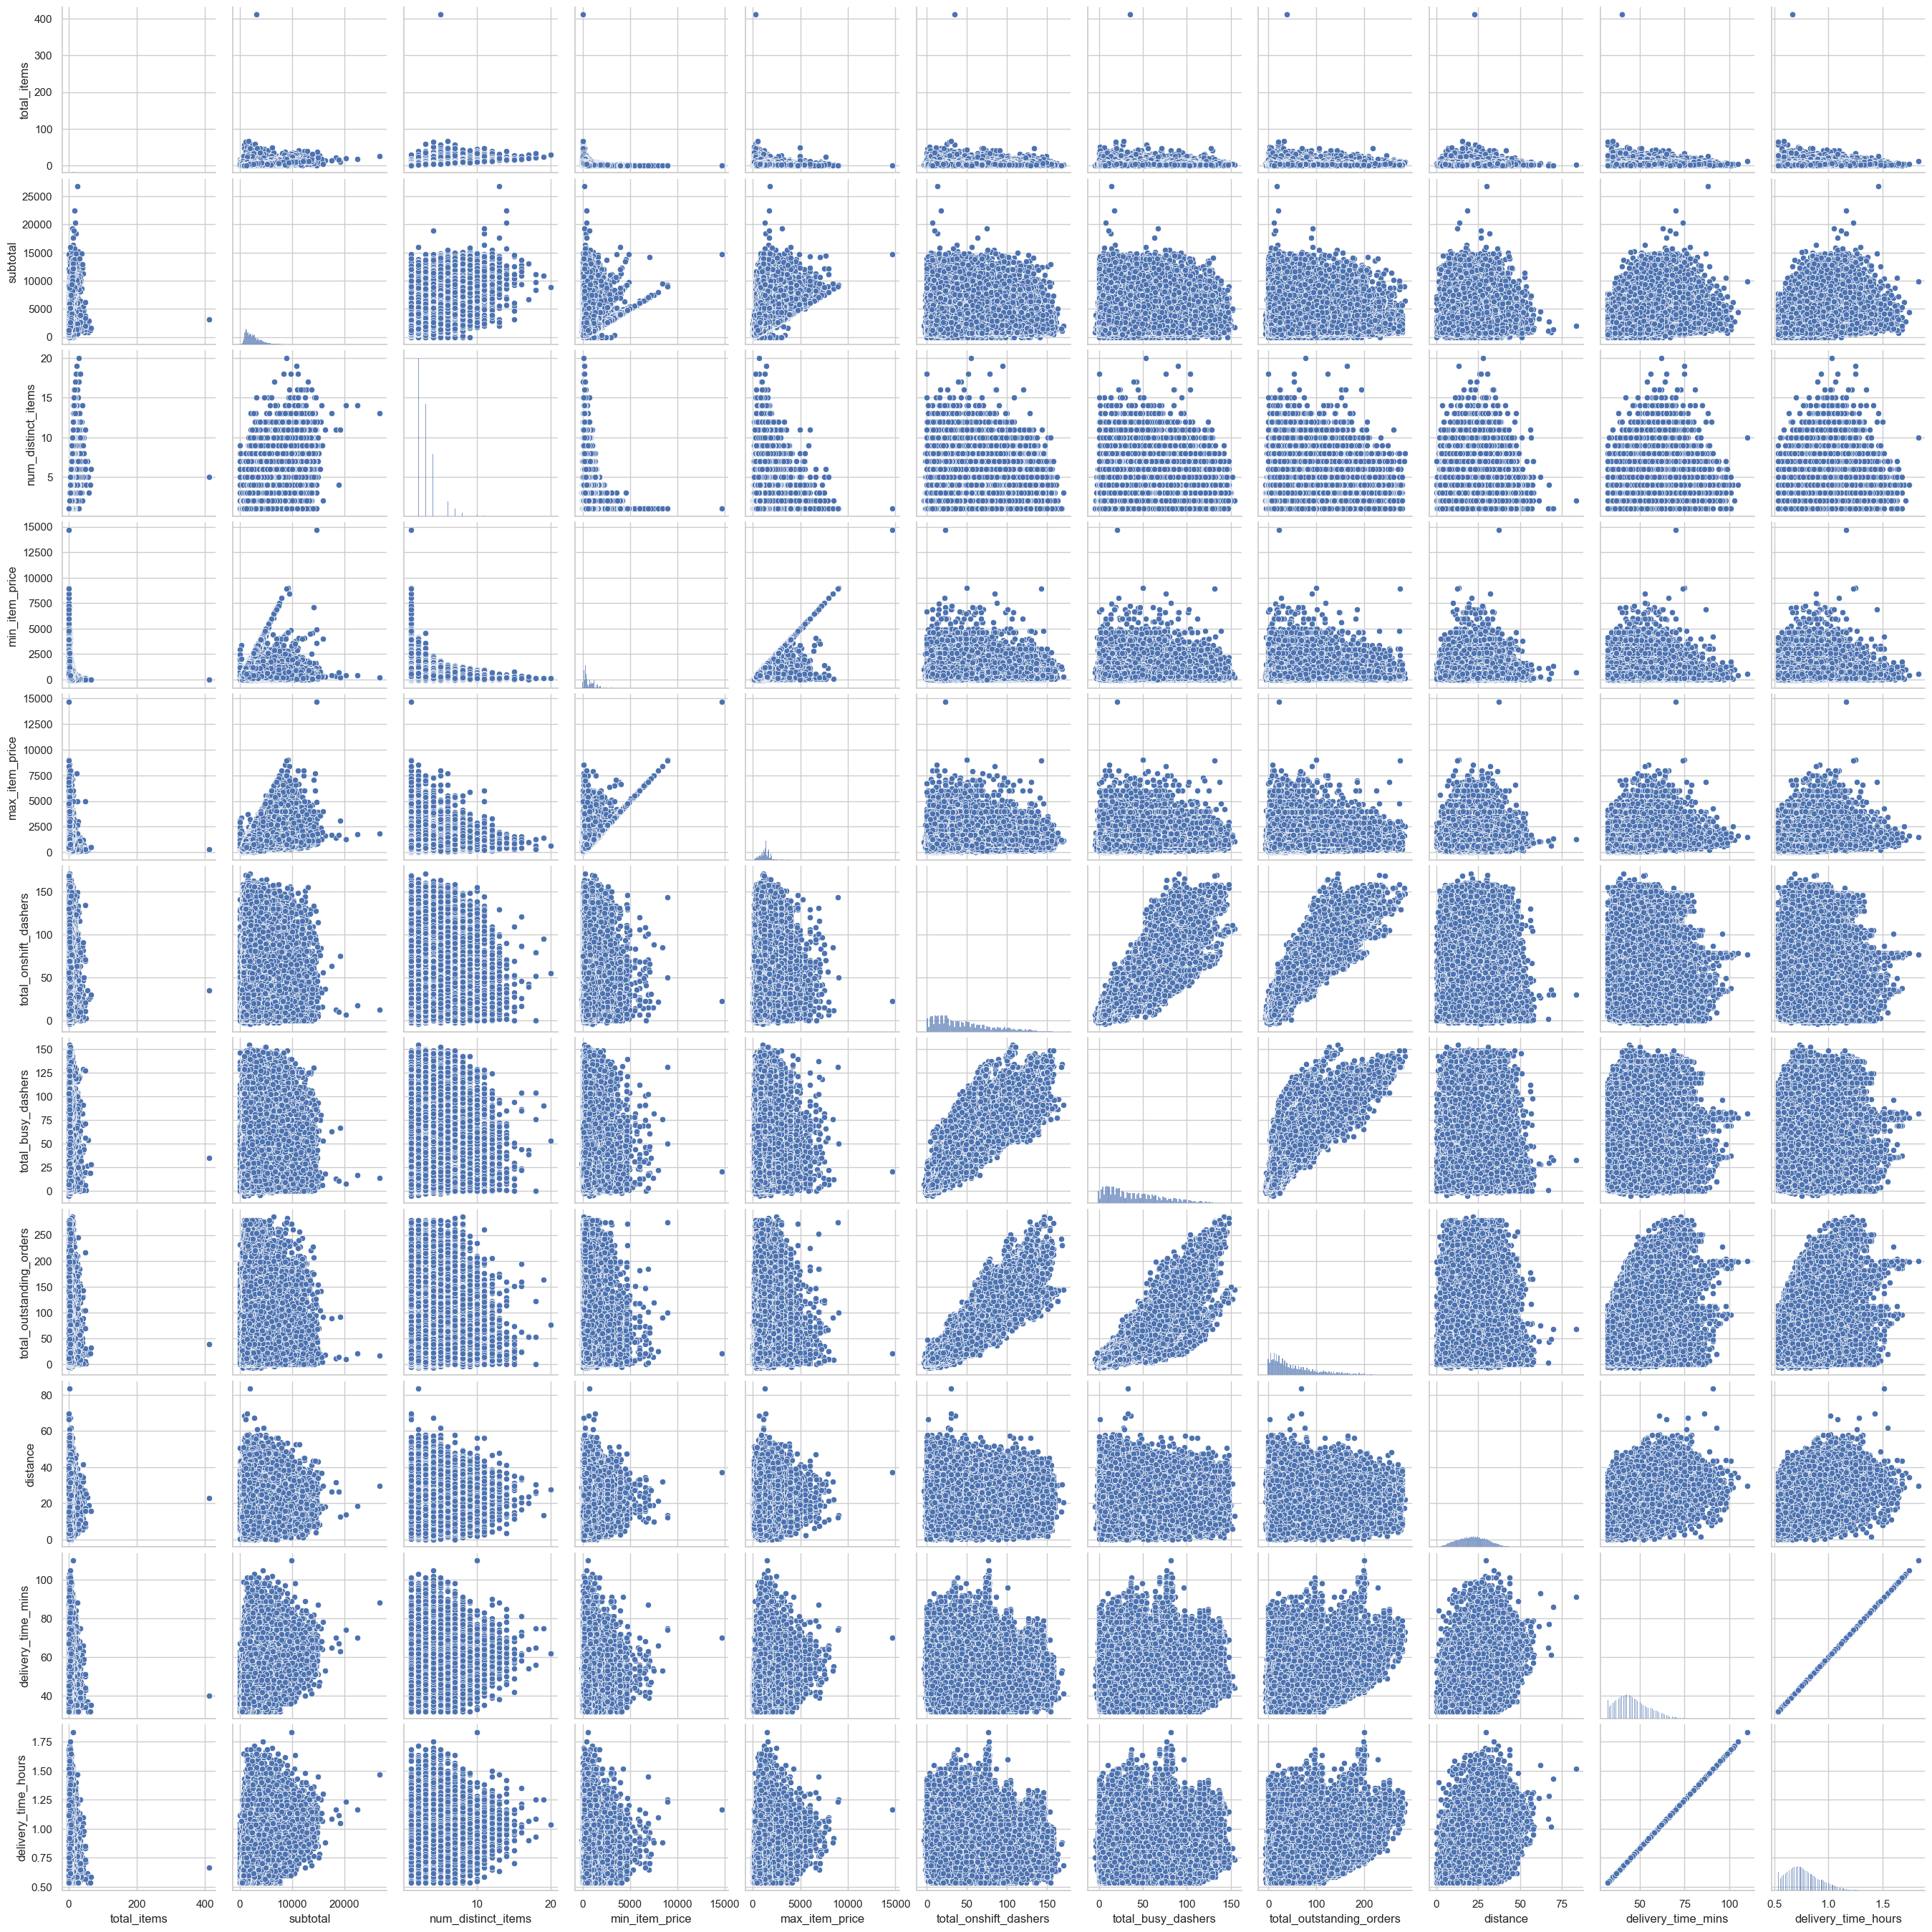

In [42]:
# Plot distributions for all numerical columns
sns.pairplot(porter[numerical_cols])

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

C:\Users\USER\AppData\Local\Temp\ipykernel_106604\3670625932.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=porter, x=col, palette='pastel')


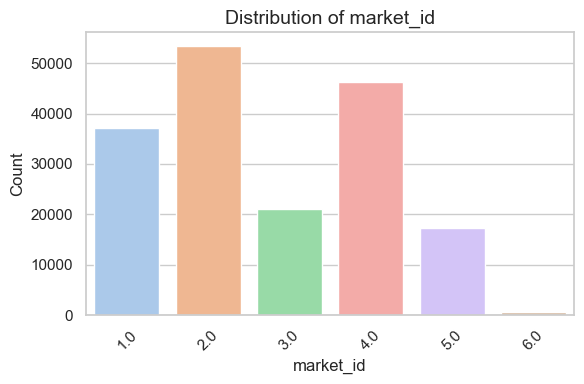

C:\Users\USER\AppData\Local\Temp\ipykernel_106604\3670625932.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=porter, x=col, palette='pastel')


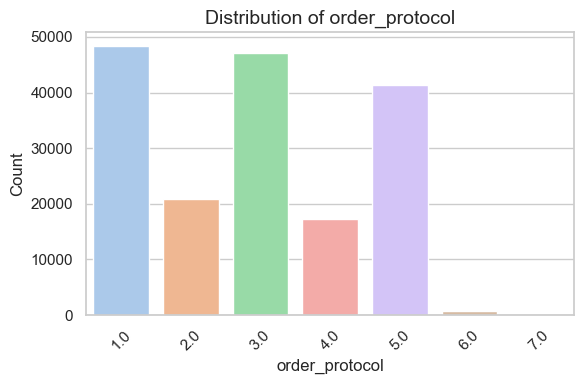

C:\Users\USER\AppData\Local\Temp\ipykernel_106604\3670625932.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=porter, x=col, palette='pastel')


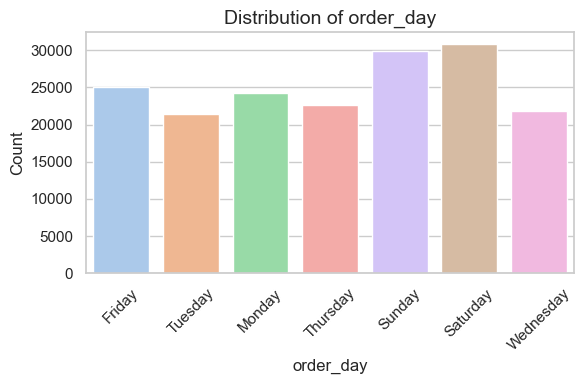

In [15]:
# Distribution of categorical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(style="whitegrid")

# Loop through each categorical column
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=porter, x=col, palette='pastel')
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

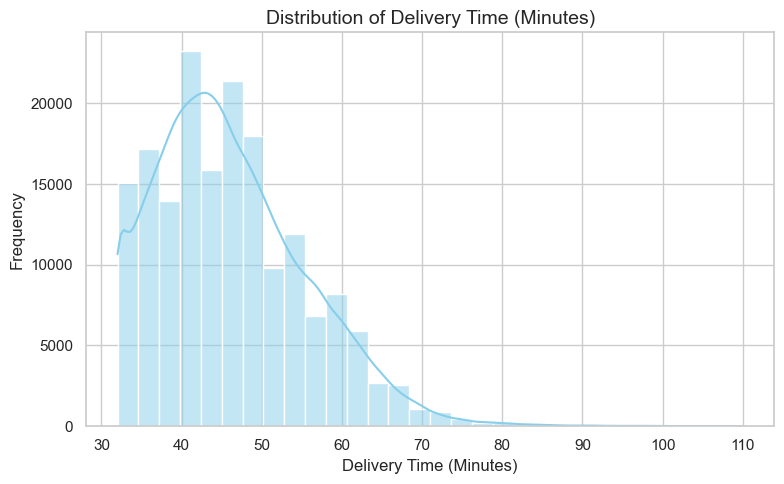

In [40]:
# Distribution of time_taken

import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of delivery time in minutes
plt.figure(figsize=(8, 5))
sns.histplot(porter['delivery_time_mins'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Delivery Time (Minutes)', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

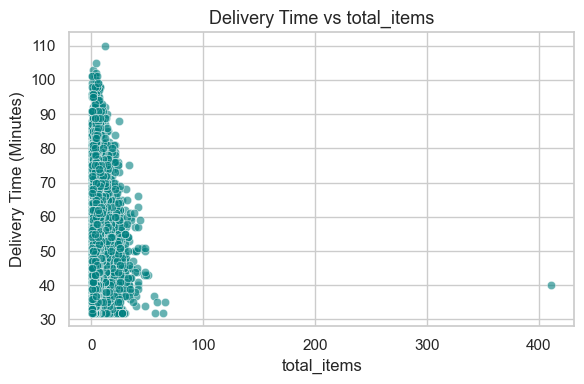

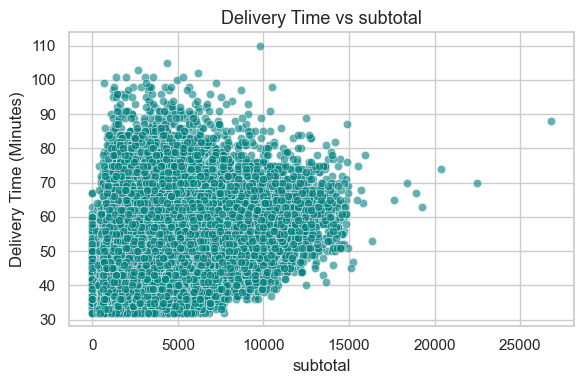

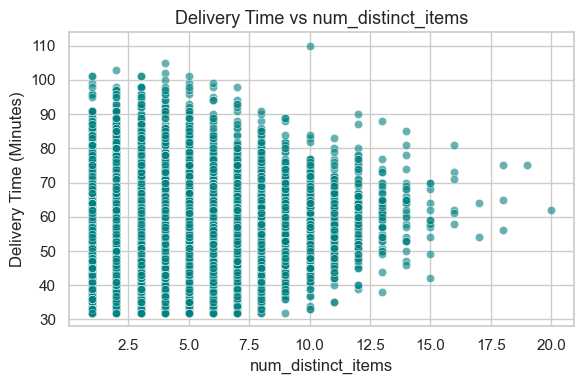

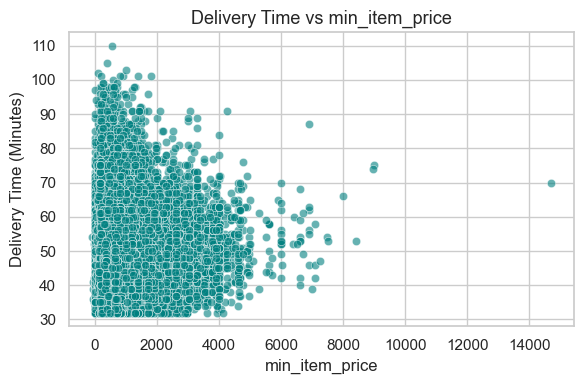

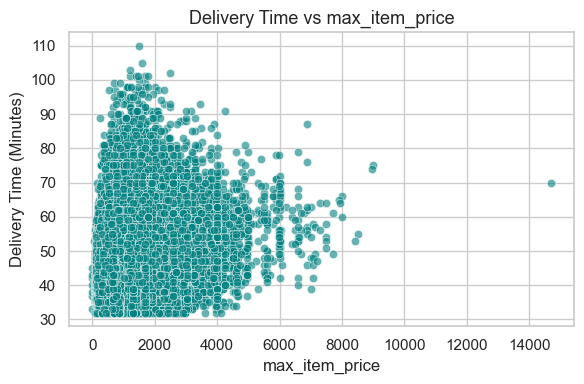

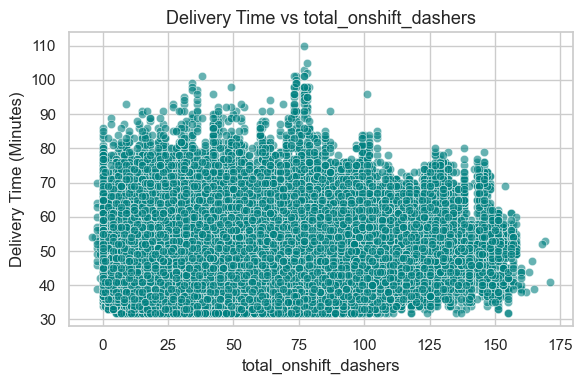

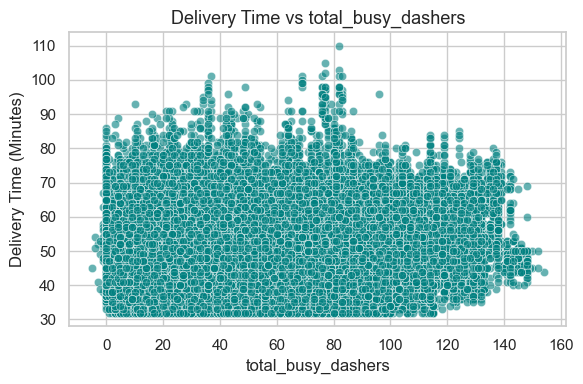

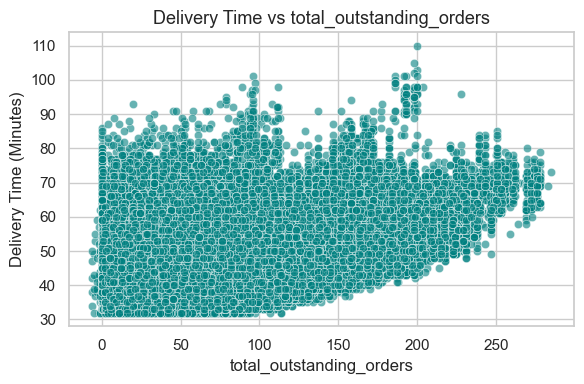

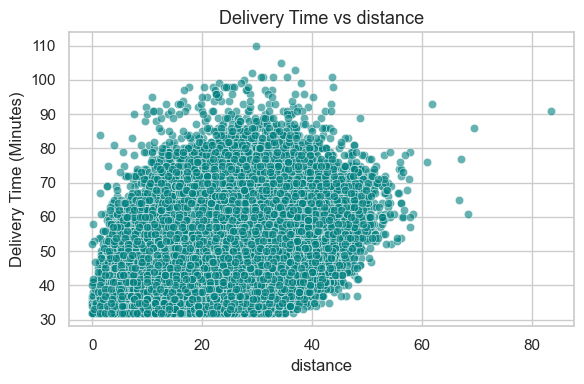

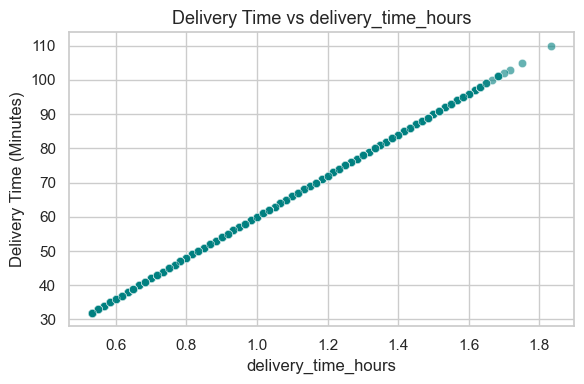

In [ ]:

sns.set(style="whitegrid")


for col in numerical_cols:
    if col != 'delivery_time_mins':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=porter[col], y=porter['delivery_time_mins'], alpha=0.6, color='teal')
        plt.title(f'Delivery Time vs {col}', fontsize=13)
        plt.xlabel(col)
        plt.ylabel('Delivery Time (Minutes)')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_106604\4231612402.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='order_hour', y='delivery_time_mins', data=porter, palette='Set3')


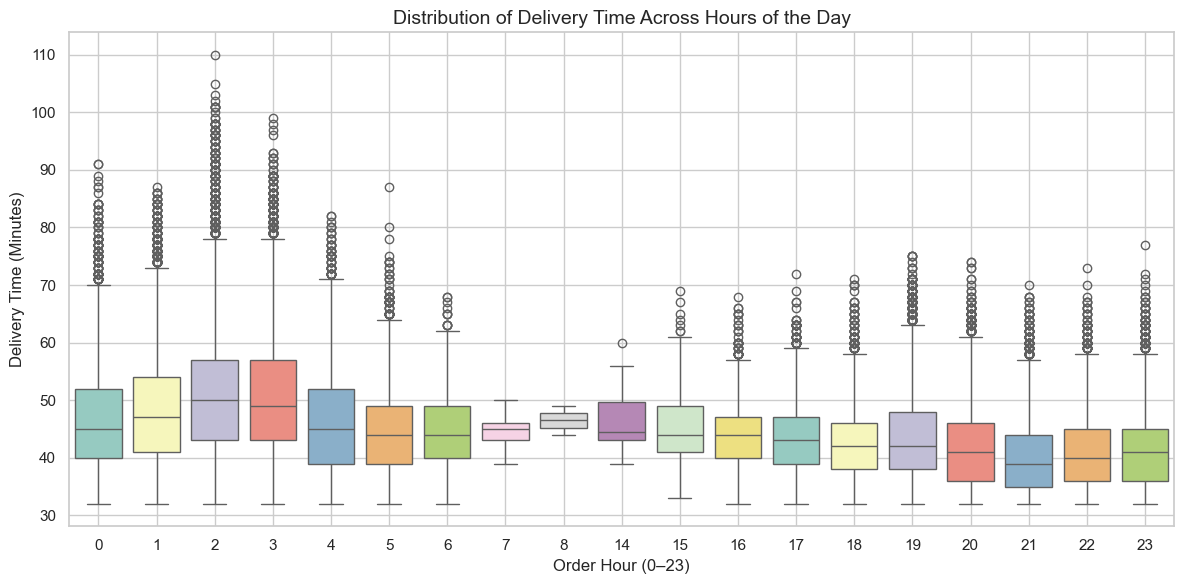

In [46]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_hour', y='delivery_time_mins', data=porter, palette='Set3')

plt.title('Distribution of Delivery Time Across Hours of the Day', fontsize=14)
plt.xlabel('Order Hour (0–23)', fontsize=12)
plt.ylabel('Delivery Time (Minutes)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

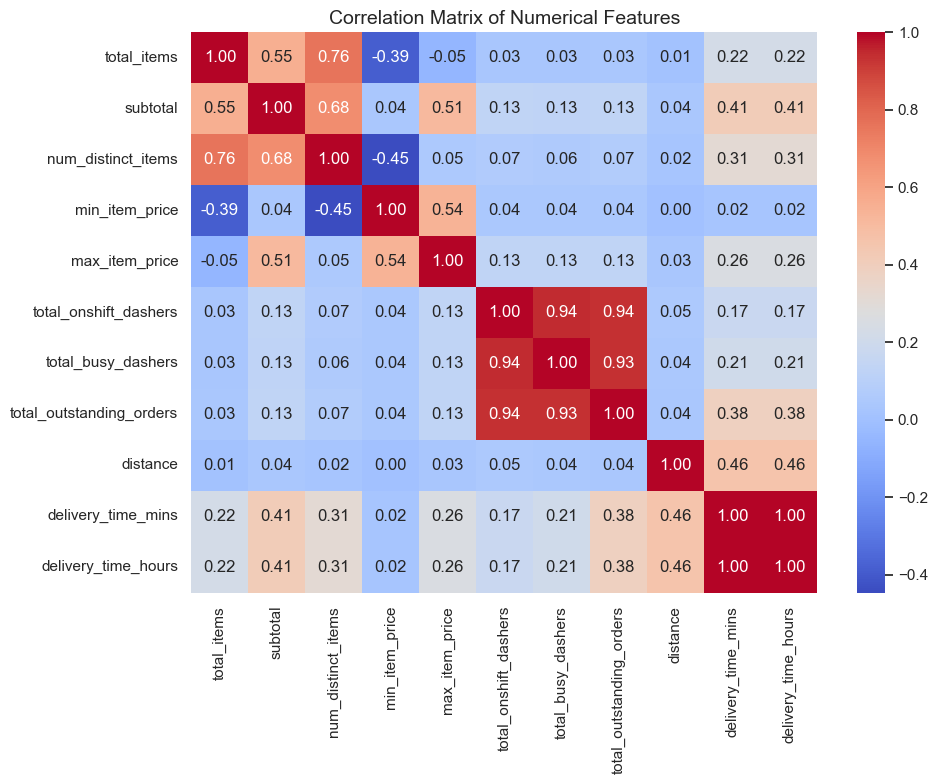

In [47]:
# Plot the heatmap of the correlation matrix
corr_matrix = porter[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features', fontsize=14)
plt.tight_layout()
plt.show()


##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [48]:
# Drop 3-5 weakly correlated columns from training dataset
columns_to_drop = [
    'min_item_price',
    'total_onshift_dashers',
    'total_busy_dashers',
    'total_items',
    'num_distinct_items'
]
X_train = X_train.drop(columns=columns_to_drop)


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

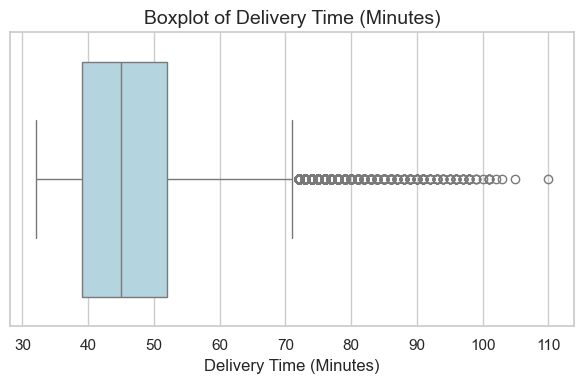

In [49]:
# Boxplot for time_taken

plt.figure(figsize=(6, 4))
sns.boxplot(x=porter['delivery_time_mins'], color='lightblue')

plt.title('Boxplot of Delivery Time (Minutes)', fontsize=14)
plt.xlabel('Delivery Time (Minutes)', fontsize=12)
plt.tight_layout()
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [ ]:
# Handle outliers
Q1 = porter['delivery_time_mins'].quantile(0.25)
Q3 = porter['delivery_time_mins'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

porter_filtered = porter[(porter['delivery_time_mins'] >= lower_bound) & 
                         (porter['delivery_time_mins'] <= upper_bound)]

X_train = X_train[(y_train >= lower_bound) & (y_train <= upper_bound)]
y_train = y_train[(y_train >= lower_bound) & (y_train <= upper_bound)]

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [23]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [24]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [25]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [26]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [27]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [28]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [29]:
# Import libraries



#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [54]:
# Apply scaling to the numerical columns

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

porter[numerical_cols] = scaler.fit_transform(porter[numerical_cols])

porter.head()


market_id order_protocol  total_items  subtotal  num_distinct_items  \
0       1.0            1.0     0.007317  0.128396            0.157895   
1       2.0            2.0     0.000000  0.070896            0.000000   
2       2.0            3.0     0.007317  0.178022            0.105263   
3       1.0            1.0     0.000000  0.056903            0.000000   
4       1.0            1.0     0.002439  0.135075            0.052632   

   min_item_price  max_item_price  total_onshift_dashers  total_busy_dashers  \
0        0.043487        0.084286               0.211429            0.119497   
1        0.100500        0.095238               0.028571            0.044025   
2        0.061274        0.109116               0.068571            0.069182   
3        0.108954        0.103741               0.051429            0.069182   
4        0.102191        0.149320               0.051429            0.062893   

   total_outstanding_orders  distance   delivery_time  delivery_time_mins  \
0                  0.092784  0.412356 0 days 00:47:00            0.192308   
1                  0.027491  0.330460 0 days 00:44:00            0.153846   
2                  0.082474  0.138410 0 days 00:55:00            0.294872   
3                  0.048110  0.380747 0 days 00:59:00            0.346154   
4                  0.044674  0.098180 0 days 00:46:00            0.179487   

   delivery_time_hours  order_hour order_day  isWeekend  
0             0.192308          22    Friday          0  
1             0.153846          21   Tuesday          0  
2             0.294872           0    Monday          0  
3             0.346154           3  Thursday          0  
4             0.179487           2   Tuesday          0

Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [55]:
# Create/Initialise the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [59]:
# Train the model using the training data
X_train = X_train.drop(columns=['delivery_time'], errors='ignore')
X_train = pd.get_dummies(X_train, drop_first=True)
model.fit(X_train, y_train)

LinearRegression()

In [60]:
# Make predictions
X_test = pd.get_dummies(X_test, drop_first=True)

# Align test columns with train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
y_pred = model.predict(X_test)

In [74]:
X_train_cleaned = X_train.drop(columns=['delivery_time_hours'])

X_train_encoded = pd.get_dummies(X_train_cleaned, drop_first=True)
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_encoded).astype(float)
y_train = y_train.astype(float)


ols_model = sm.OLS(y_train, X_train_sm).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:     delivery_time_mins   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.635
Method:                 Least Squares   F-statistic:                     9637.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        09:38:03   Log-Likelihood:            -3.7662e+05
No. Observations:              121843   AIC:                         7.533e+05
Df Residuals:                  121820   BIC:                         7.535e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [75]:
# Loop through the number of features and test the model
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score


model = LinearRegression()


for k in range(1, X_train_encoded.shape[1] + 1):
    sfs = SequentialFeatureSelector(model, n_features_to_select=k, direction='forward')
    sfs.fit(X_train_encoded, y_train)

    selected_features = X_train_encoded.columns[sfs.get_support()]
    X_selected = X_train_encoded[selected_features]
    
    model.fit(X_selected, y_train)
    y_train_pred = model.predict(X_selected)
    
    r2 = r2_score(y_train, y_train_pred)
    print(f"Top {k} features - R²: {r2:.4f}")


Top 1 features - R²: 0.2150
Top 2 features - R²: 0.3698
Top 3 features - R²: 0.4677
Top 4 features - R²: 0.5185
Top 5 features - R²: 0.5680
Top 6 features - R²: 0.5794
Top 7 features - R²: 0.5898
Top 8 features - R²: 0.5986
Top 9 features - R²: 0.6098
Top 10 features - R²: 0.6173
Top 11 features - R²: 0.6266
Top 12 features - R²: 0.6294
Top 13 features - R²: 0.6323
Top 14 features - R²: 0.6332
Top 15 features - R²: 0.6339
Top 16 features - R²: 0.6344
Top 17 features - R²: 0.6349
Top 18 features - R²: 0.6350
Top 19 features - R²: 0.6351
Top 20 features - R²: 0.6351
Top 21 features - R²: 0.6351


KeyboardInterrupt: 

In [ ]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)


X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [83]:
# Build the final model with selected number of features

X_train_final = X_train_encoded[selected_features]
X_test_final = X_test_encoded[selected_features] 
from sklearn.linear_model import LinearRegression

final_model = LinearRegression()
final_model.fit(X_train_final, y_train)
y_pred = final_model.predict(X_test_final)

## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [84]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R² Score: 0.634252776524288
MAE: 4.363076329401299
RMSE: 5.652081410956011


c:\Users\USER\New folder\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


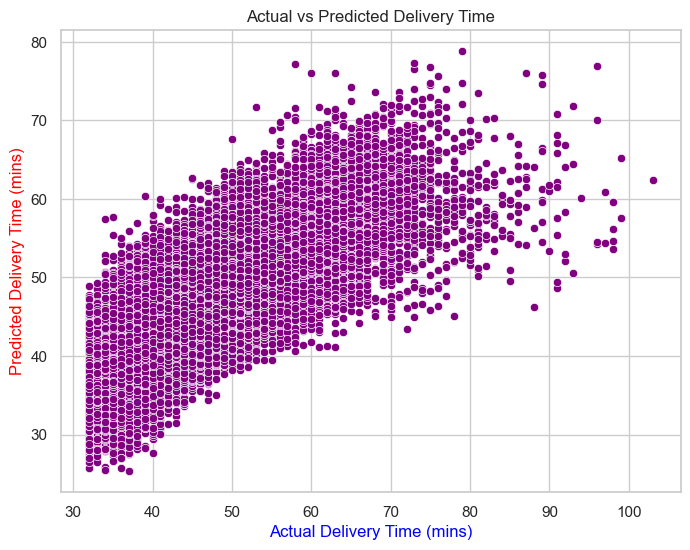

In [90]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, color='purple')  
plt.xlabel("Actual Delivery Time (mins)", color='blue')
plt.ylabel("Predicted Delivery Time (mins)", color='red')
plt.title("Actual vs Predicted Delivery Time")
plt.grid(True)
plt.show()


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [93]:
print(selected_features)

Index(['subtotal', 'max_item_price', 'total_outstanding_orders', 'distance',
       'order_hour', 'isWeekend', 'market_id_2.0', 'market_id_3.0',
       'market_id_4.0', 'market_id_5.0', 'market_id_6.0', 'order_protocol_2.0',
       'order_protocol_3.0', 'order_protocol_4.0', 'order_protocol_5.0',
       'order_protocol_6.0', 'order_protocol_7.0', 'order_day_Monday',
       'order_day_Thursday', 'order_day_Tuesday', 'order_day_Wednesday'],
      dtype='object')


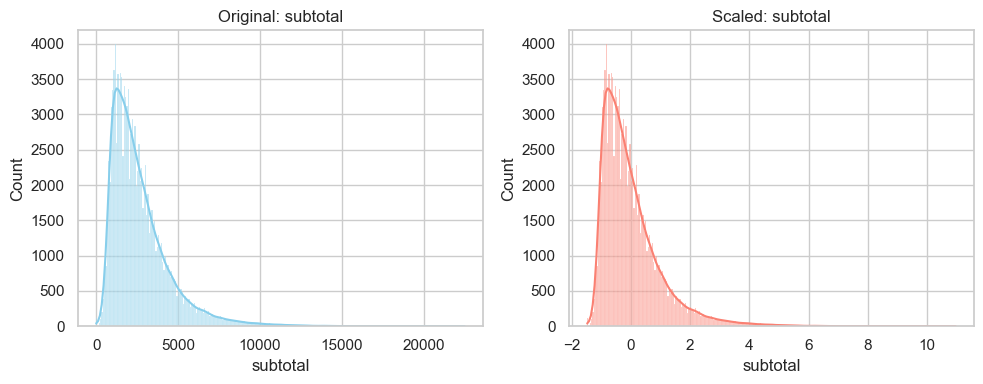

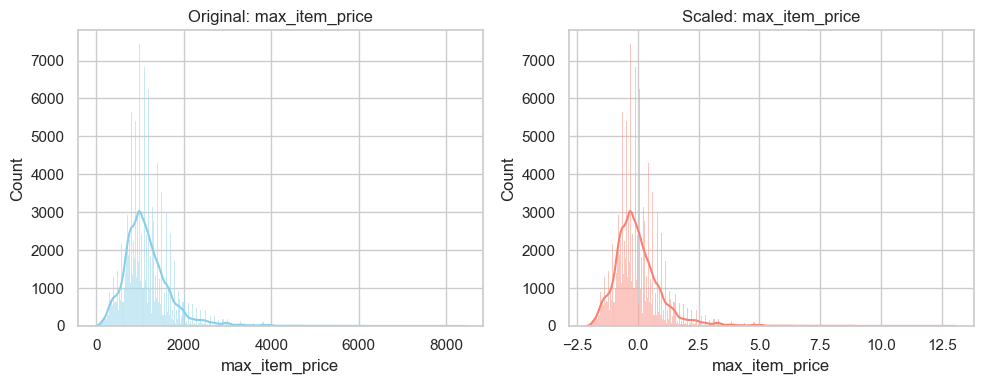

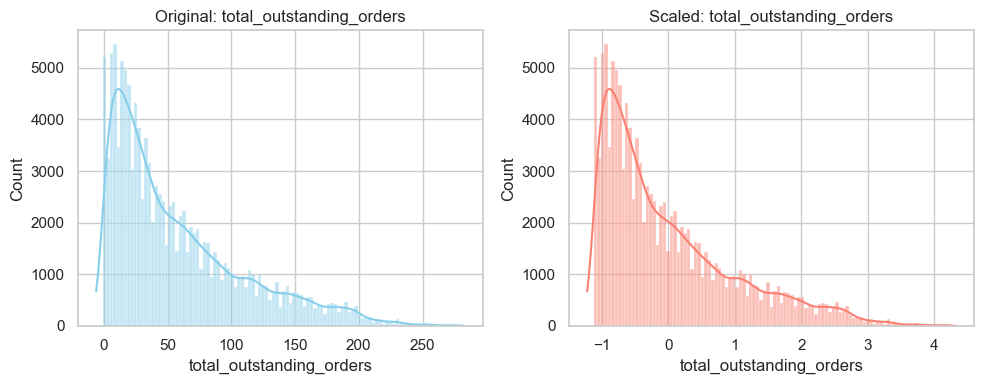

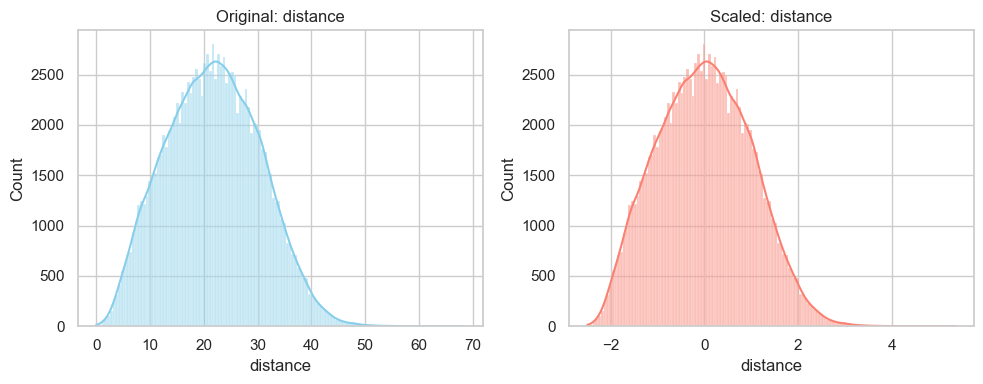

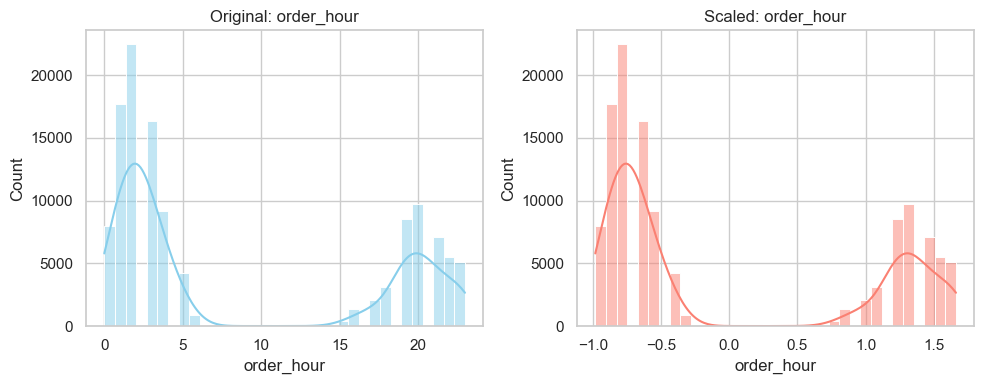

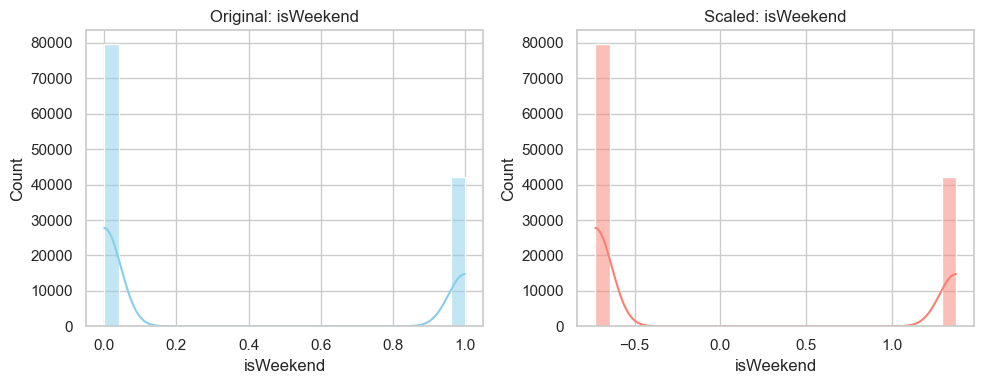

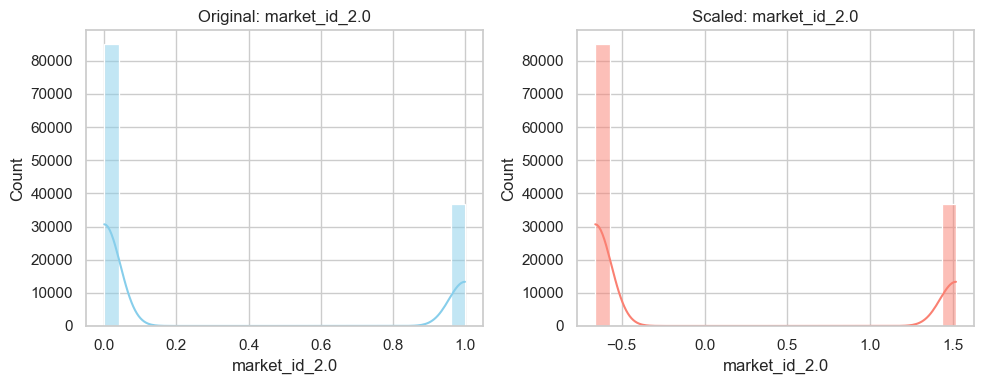

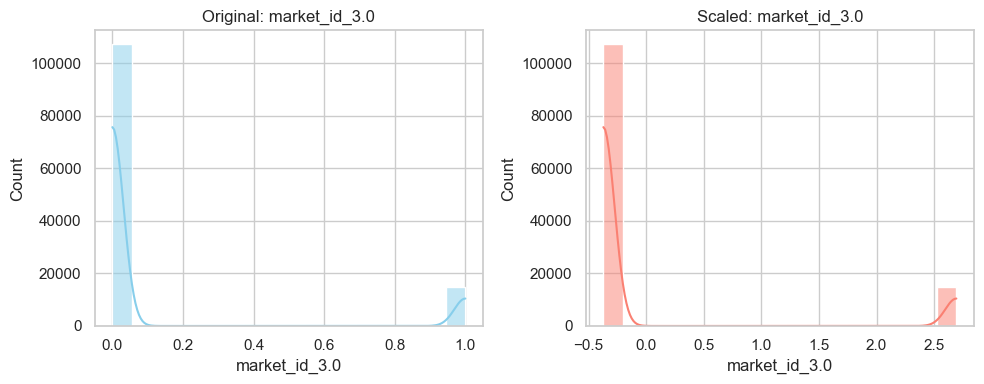

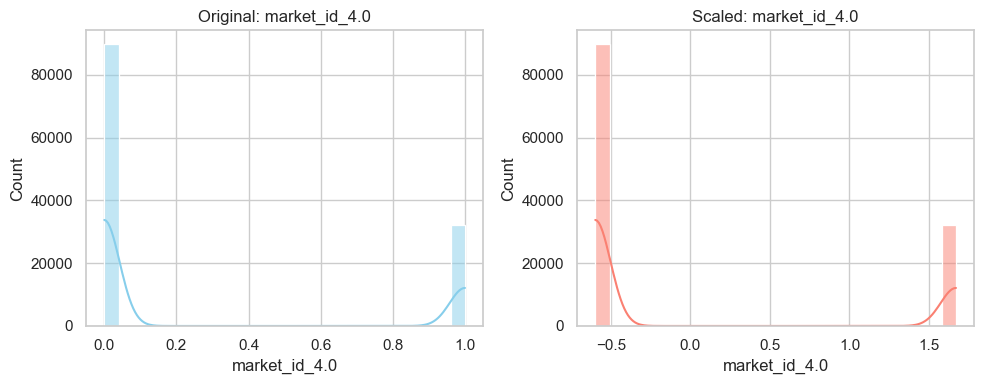

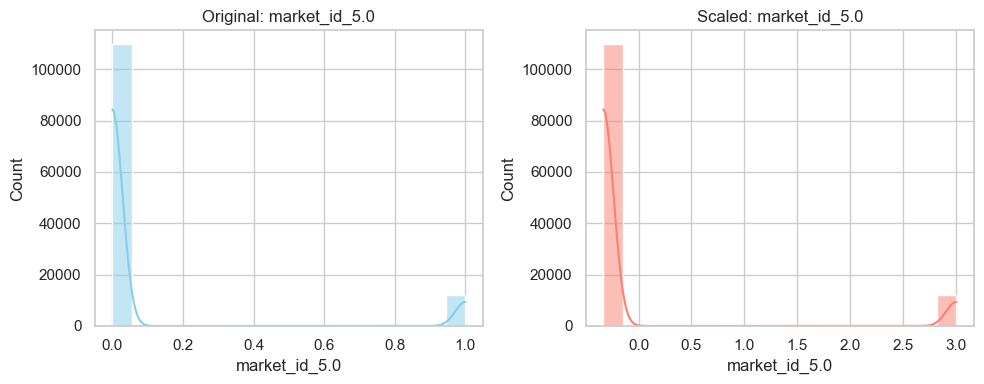

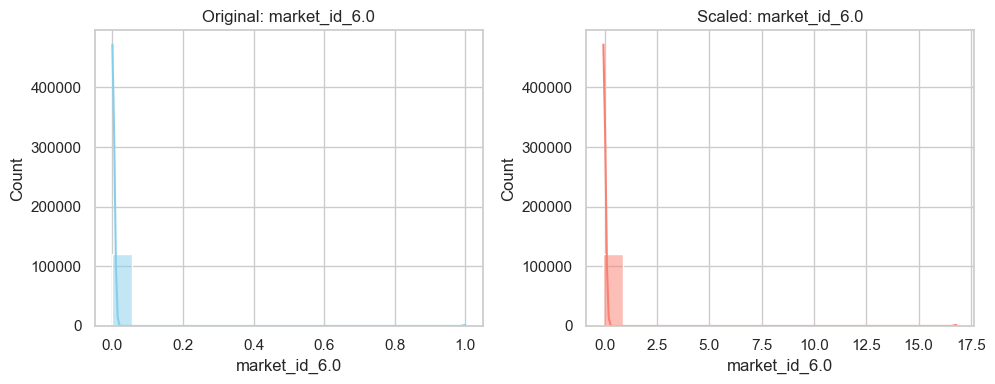

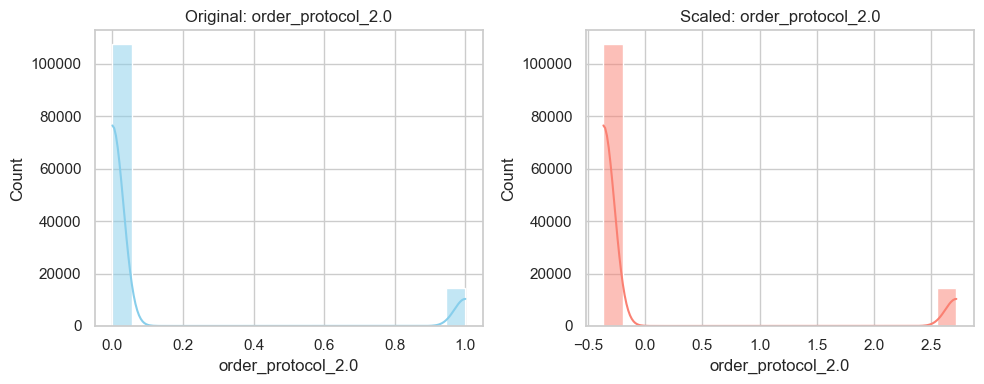

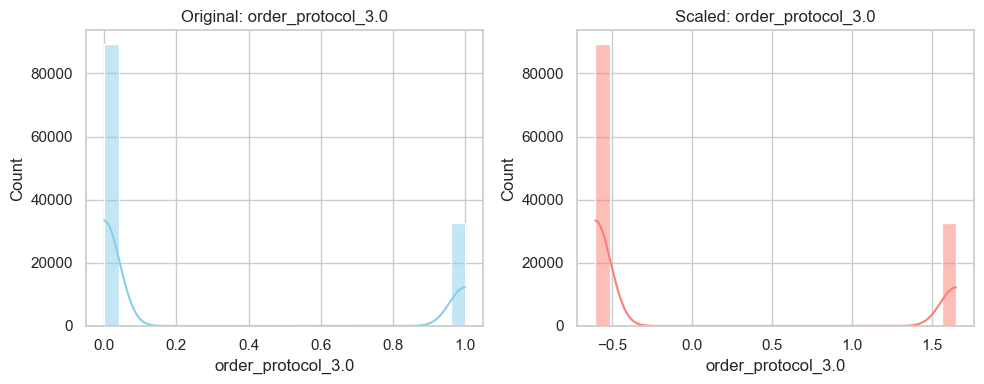

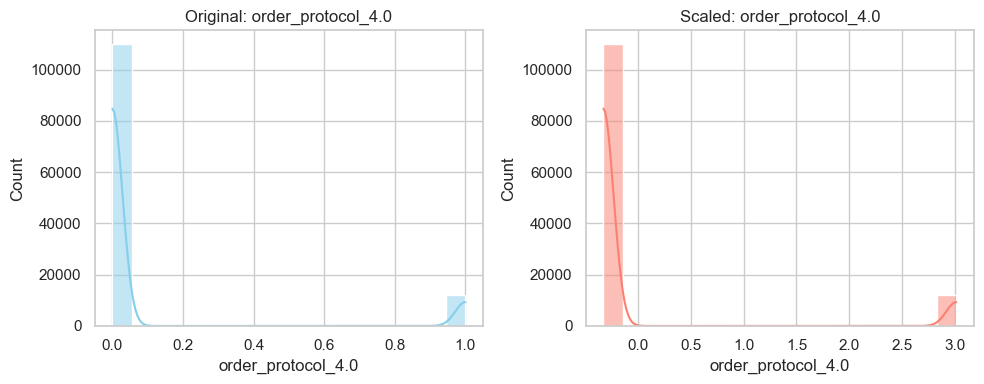

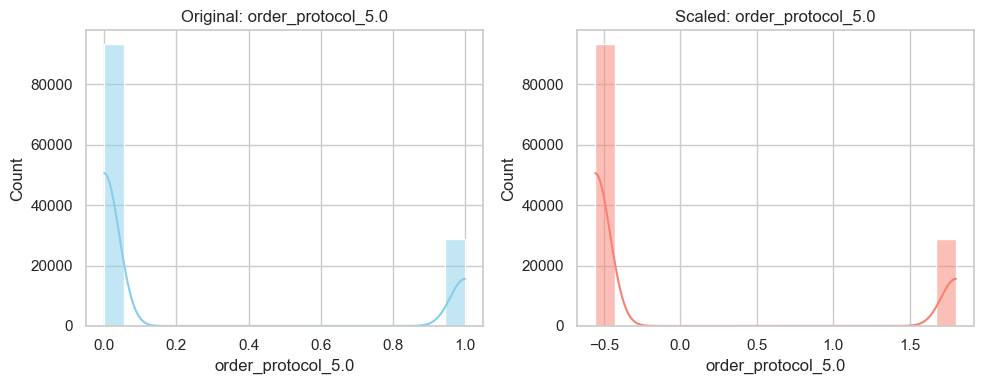

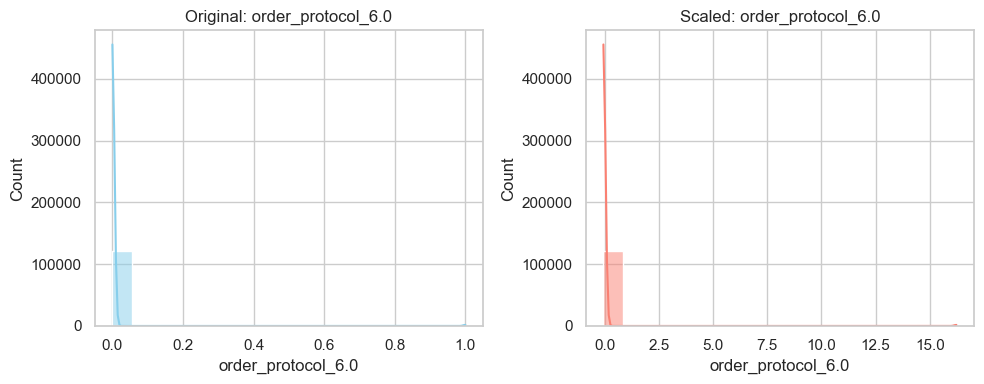

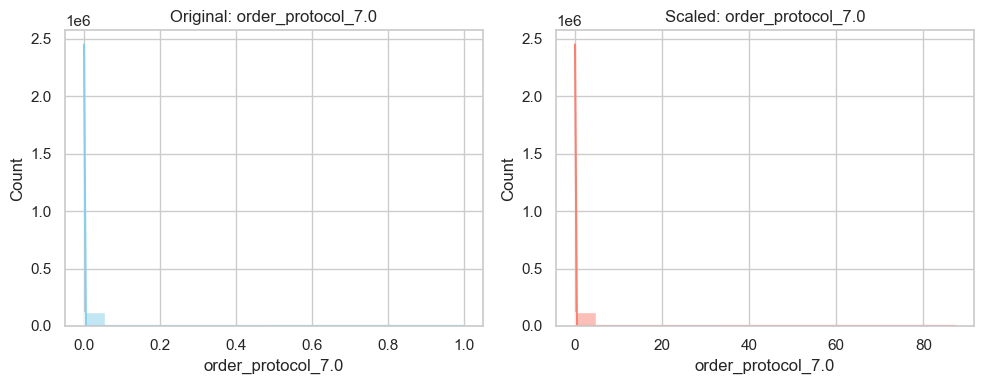

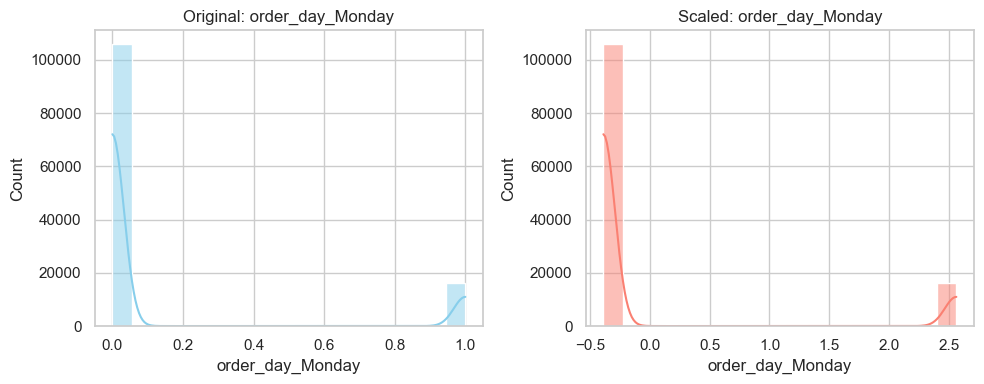

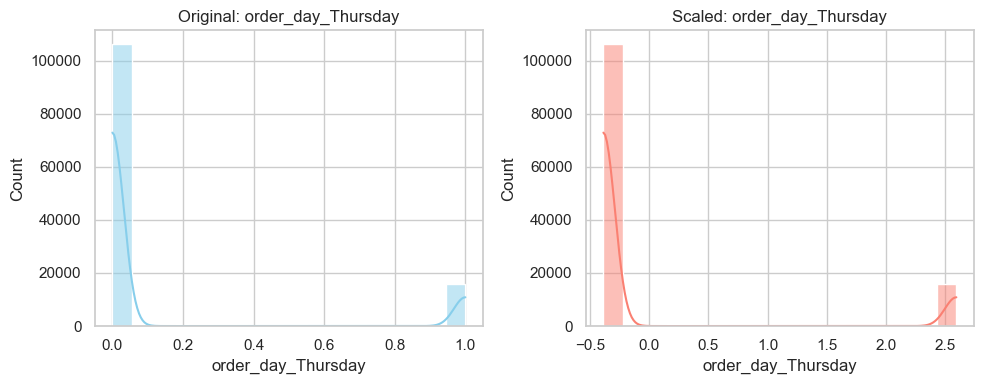

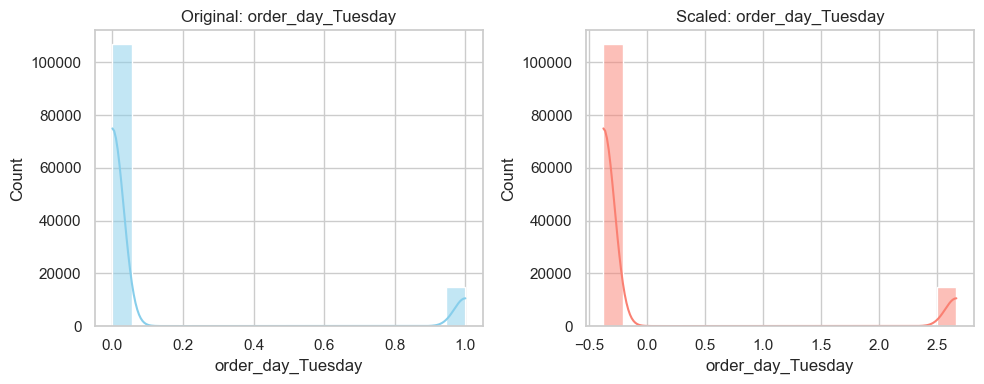

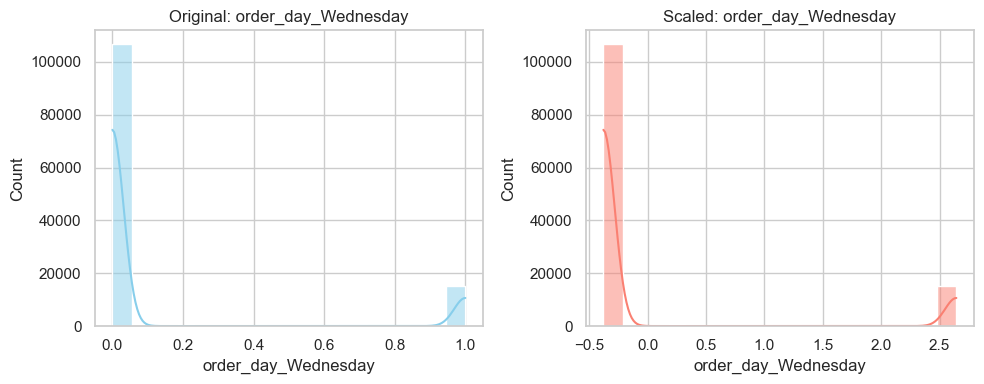

In [92]:
# Compare the scaled vs unscaled features used in the final model
final_features = selected_features
unscaled_data = X_train[final_features]


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = pd.DataFrame(
    scaler.fit_transform(unscaled_data),
    columns=final_features
)


for col in final_features:
    plt.figure(figsize=(10, 4))


    plt.subplot(1, 2, 1)
    sns.histplot(unscaled_data[col], kde=True, color='skyblue')
    plt.title(f"Original: {col}")
    plt.xlabel(col)


    plt.subplot(1, 2, 2)
    sns.histplot(scaled_data[col], kde=True, color='salmon')
    plt.title(f"Scaled: {col}")
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

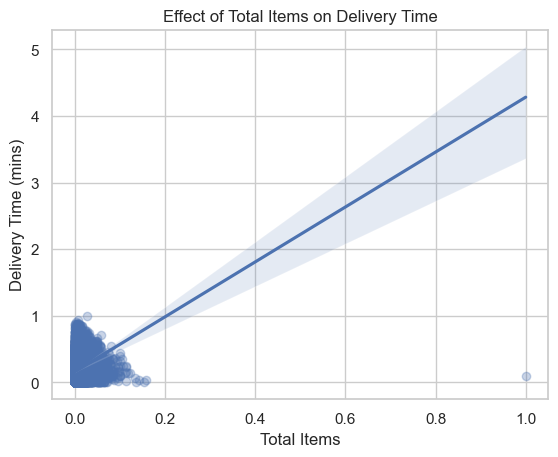

In [97]:
# Analyze the effect of a unit change in a feature, say 'total_items'
sns.regplot(x='total_items', y='delivery_time_mins', data=porter, scatter_kws={'alpha':0.3})
plt.title("Effect of Total Items on Delivery Time")
plt.xlabel("Total Items")
plt.ylabel("Delivery Time (mins)")
plt.grid(True)
plt.show()


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>

In [ ]:
Yes, the data set did contain variables that were categorical. like marekt _id, order_protocol. Of These the market_id and is_weekend had the most affect. 



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>



---



In [ ]:
It refers to havng 80% of the data as train and 20% as test data set.

##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
>



---



In [ ]:
Distance 

##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>



---



In [ ]:
The approach was using the box plot and removing outliers that fall below the 25th and 75th percentile. 

##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>



---



In [ ]:
The top 3 would be distance, total_outstanding orders and order hour

#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>




---



In [ ]:
The linear regression model identifies the most influential factors affecting delivery time. 
Among them, distance has the highest positive impact — longer distances lead to longer delivery times. 
Order hour has a negative coefficient, suggesting orders placed later in the day tend to be delivered faster. 
Total outstanding orders increases delivery time slightly, reflecting system load. 
Additionally, deliveries on weekends take around 1.7 minutes longer on average. 
Different market IDs also influence delivery times, indicating location-based differences. 
These insights help optimize delivery operations by focusing on key time-driving features.











##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>



---



In [ ]:
Simple linear regression uses one independent variable to predict a dependent variable, modeling a straight-line relationship.
Multiple linear regression uses two or more independent variables to predict the dependent variable, capturing more complex relationships.

##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>




---



In [ ]:
The cost function in linear regression (typically Mean Squared Error - MSE) measures how far the predicted values are from the actual values.
It is minimized using optimization techniques like Gradient Descent or Ordinary Least Squares (OLS) to find the best-fit line by 
adjusting model coefficients.

##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>



---



In [ ]:
Overfitting occurs when a model learns both the training data and its noise too well, performing poorly on unseen data.
Underfitting happens when a model is too simple to capture the underlying patterns, leading to poor performance on both training and test data.

##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>

In [ ]:
Residual plots help diagnose a linear regression model by showing the differences between actual and predicted values.

They reveal:

Non-linearity – if residuals show patterns instead of random scatter, the model may miss nonlinear trends.

Heteroscedasticity – unequal spread of residuals indicates changing variance, violating assumptions.

Outliers – large residuals suggest potential outliers affecting the model.

Model fit – ideally, residuals should be randomly scattered around zero, showing a good fit.